# FWHM als Funktion von $\rho \cdot x$

mit $$\rho(p) = \frac{\rho_0}{p_0} \cdot p$$

wobei $\rho_0 = 1,225 \frac{kg}{m^3}$ und $p_0 = 1013mbar$

damit ist FWHM als Funktion von $$\rho(p)\cdot x$$ mit $x = 34\pm 0,5 mm$ gewählter Abstand und Fehler $\Delta \rho(p) = \frac{\rho_0}{p_0} \cdot \Delta p \Rightarrow \Delta \rho(p)\cdot x = \sqrt{(p\Delta x)^2 + (x\Delta p)^2}$

In [1]:
using Plots, CSV, DataFrames, LsqFit, LaTeXStrings


In [ ]:
p_0 = 1013 #mbar
rho_0 = 1.225 #kg/m^3
#Abstand
d = 34.0 #mm
D_d = 0.5 #mm
#relativer Abstand-Offset
b = -7.4985 #mm 
D_b = 2.31845 #mm

#Absoluter Abstand
x = d-b #mm
D_x = D_d-D_b #mm

println("Absoluter Abstand:")
println("x = ", x, " +- ", D_x)


energystragg_data = CSV.read("../data/energie_straggling.csv", DataFrame)

Absoluter Abstand:
x = 41.4985 +- -1.81845


Row,Druck[mbar],ΔDruck[mbar],Zeit[s],E[keV],ΔE[keV],FWHM[keV],ΔFWHM[keV],Peaks
,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64
1,0.131,0.191,300,5489.7,0.5,50.5,0.9,3
2,100.0,10.0,120,4912.6,0.7,71.6,1.6,2
3,220.0,10.0,120,4265.3,1.5,82.7,2.0,2
4,300.0,10.0,120,3807.2,0.7,114.5,1.2,1
5,400.0,10.0,120,3202.3,0.8,125.0,1.4,1
6,450.0,10.0,120,2871.2,0.8,134.0,1.5,1
7,500.0,10.0,120,2532.9,0.8,140.0,1.6,1
8,550.0,10.0,120,2209.1,0.9,153.1,1.8,1
9,600.0,10.0,120,1794.9,1.0,159.4,1.9,1


rhos:
0.15841559723593288 +- 0.23097235932872656
120.92793682132282 +- 12.09279368213228
266.0414610069102 +- 12.09279368213228
362.7838104639684 +- 12.09279368213228
483.71174728529127 +- 12.09279368213228
544.1757156959527 +- 12.09279368213228
604.639684106614 +- 12.09279368213228
665.1036525172755 +- 12.09279368213228
725.5676209279368 +- 12.09279368213228
846.4955577492597 +- 12.09279368213228

 

rhos*x:
0.006574009661895361 +- 0.009589334363034907
5.018327986179665 +- 0.5478985183799824
11.040321569595262 +- 0.6970525378707544
15.054983958538992 +- 0.8288822689845016
20.07331194471866 +- 1.0126905828319783
22.582475937808493 +- 1.109530481069398
25.091639930898324 +- 1.2086156852468557
27.600803923988156 +- 1.309436586919918
30.109967917077984 +- 1.4116213338007333
35.12829590325765 +- 1.6190463127429289
Fitparameter:
a = 3808.451955896223 +- 167.7928992147591 keV*kg/m^2
b= 49.15942316898727 +- 3.6832865507438677 keV


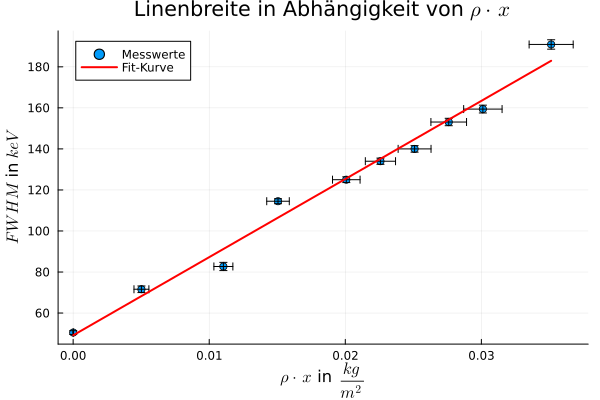

In [3]:


ps = energystragg_data[1:10, 1] #mbar
D_ps = energystragg_data[1:10,2] #mbar
ss = energystragg_data[1:10,3] #seconds
Es = energystragg_data[1:10,4] #keV
D_Es = energystragg_data[1:10,5] #keV
FWHMs = energystragg_data[1:10,6] #keV
D_FWHMs = energystragg_data[1:10,7] #keV

rhos = rho_0 / p_0 .* ps
D_rhos = rho_0 / p_0 .* D_ps
rho_xs = rhos .* x * 1e-3
D_rho_xs = sqrt.((rhos .* D_x*1e-3).^2 + (x*1e-3 * D_rhos).^2)


#Ausgabe rho und fehler
println("rhos:")
for i in 1:length(rhos)
    println(rhos[i]*1e3, " +- ", D_rhos[i]*1e3) #Ausgabe in g/m^3
end

println("\n \n")

#Ausgabe rho*x und Fehler
println("rhos*x:")
for i in 1:length(rho_xs)
    println(rho_xs[i]*1e3, " +- ", D_rho_xs[i]*1e3) #Ausgabe in g/m^2
end

# Fit-Funktion definieren (lineare Regression)
fit_model(x, p) = p[1] * x .+ p[2]

# Fit durchführen
initial_params = [(FWHMs[1] - FWHMs[end]) / (rho_xs[1] - rho_xs[end])*0.7, 1.]  # Anfangsschätzungen für die Parameter
fit_result = curve_fit(fit_model, rho_xs, FWHMs, initial_params)
fit_params = fit_result.param  # Angepasste Parameter (Steigung, Achsenabschnitt)

# Berechne den Bereich für die Fit-Kurve (1/p_means)
p_fit = range(minimum(rho_xs), maximum(rho_xs), length=100)  
fit_curve = fit_model(p_fit, fit_params)  # Berechne die Fit-Kurve mit den angepassten Parametern

Delta_fit_params = standard_errors(fit_result) #Fehler der Fitparameter

fig_FWHM_rho_x = plot(
    rho_xs, FWHMs,
    seriestype="scatter",
    yerror=D_FWHMs, xerror=D_rho_xs,
    label="Messwerte",
    xlabel=L"\rho\cdot x" * " in " * L"\frac{kg}{m^2}",
    ylabel=L"FWHM" * " in " * L"keV",
    title="Linenbreite in Abhängigkeit von " * L"\rho \cdot x"
)

plot!(
    p_fit,
    fit_curve,
    label="Fit-Kurve",
    linewidth=2,
    color=:red
)

savefig(fig_FWHM_rho_x, "../plots/FWHM_RHO_x.png")

println("Fitparameter:")
println("a = ", fit_params[1], " +- ", Delta_fit_params[1], " keV*kg/m^2")
println("b= ", fit_params[2], " +- ", Delta_fit_params[2], " keV")

display(fig_FWHM_rho_x)

Nehme ann Energiestraggling bei niedrigstem Druck vernachlässigbar. D.h $E_\alpha = E_{p=min}$ mit der Energieauflösung $\Delta E_\alpha = FWHM_{p=min}$ <br>
mit relativer Energieauflösung $$\frac{\Delta E_\alpha}{E_\alpha}$$

In [4]:
E_alpha = Es[1]
D_E_alpha = FWHMs[1]
D_D_E_alpha = D_FWHMs[1]

rel_energy_res = D_E_alpha/E_alpha * 100
D_energy_res = sqrt((D_D_E_alpha/E_alpha)^2 + (D_E_alpha/E_alpha^2)^2) * 100

println("Energieauflösnug = ", rel_energy_res, " +- ", D_energy_res)


Energieauflösnug = 0.9199045485181341 +- 0.01639519484193411


Energestragglingparameter ergibt sich so
$$
    \alpha = \sqrt{(FWHM^2 - \Delta E_\alpha^2)}
$$

In [5]:
function alpha(FWHM)
    return sqrt(FWHM^2 - D_E_alpha^2)
end

alphas = alpha.(FWHMs)
D_alphas=sqrt.((D_E_alpha^2*D_D_E_alpha^2) ./(D_E_alpha^2 .+FWHMs.^2) .+(FWHMs.^2 .*D_FWHMs .^2) ./(D_E_alpha^2 .+FWHMs.^2))

println("alphas: ")
for i in 1:length(alphas)
    println(alphas[i], " +- ", D_alphas[i])
end

alphas: 
0.0 +- 0.9000000000000001
50.75736399774913 +- 1.4066438329778939
65.4907627074231 +- 1.770191711373642
102.76186062932103 +- 1.1564631473896578
114.34487308139356 +- 1.341133250508844
124.11990170798558 +- 1.4390674365240015
130.57469126902043 +- 1.5357458298097943
144.5315190538036 +- 1.732500135255042
151.18898769421006 +- 1.8315560216158373
184.0993210199321 +- 2.235396176397754


Fitparameter:
a = 4300.045075361584 +- 238.36603308774158
b = 27.061120577544955 +- 5.5155019369114555


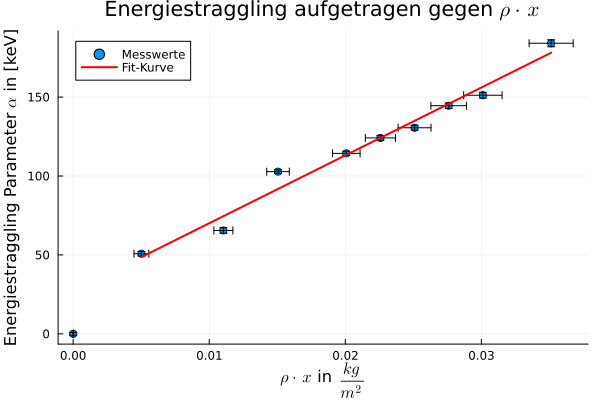

In [ ]:
rho_xs = rhos .* x * 1e-3
D_rho_xs = sqrt.((rhos .* D_x*1e-3).^2 + (x*1e-3 * D_rhos).^2)

# Fit-Funktion definieren (lineare Regression)
fit_model(x, p) = p[1] * x .+ p[2]

# Fit durchführen
initial_params = [(alphas[2] - alphas[end]) / (rho_xs[2] - rho_xs[end])*0.7, 1.]  # Anfangsschätzungen für die Parameter
fit_result = curve_fit(fit_model, rho_xs[2:end], alphas[2:end], initial_params)
fit_params = fit_result.param  # Angepasste Parameter (Steigung, Achsenabschnitt)

# Berechne den Bereich für die Fit-Kurve (1/p_means)
p_fit = range(minimum(rho_xs[2:end]), maximum(rho_xs[2:end]), length=100)  
fit_curve = fit_model(p_fit, fit_params)  # Berechne die Fit-Kurve mit den angepassten Parametern

Delta_fit_params = standard_errors(fit_result) #Fehler der Fitparameter

fig_alpha_rho_x = plot(
    rho_xs, alphas,
    xerror=D_rho_xs, yerror=D_alphas,
    seriestype="scatter",
    xlabel=L"\rho\cdot x" * " in " * L"\frac{kg}{m^2}",
    ylabel="Energiestraggling Parameter " *L"\alpha" * " in [keV]",
    label="Messwerte",
    title="Energiestraggling aufgetragen gegen " *L"\rho \cdot x"
)

plot!(
    p_fit,
    fit_curve,
    label="Fit-Kurve",
    linewidth=2,
    color=:red
)

savefig(fig_alpha_rho_x, "../plots/alpha_rho_x.png")

println("Fitparameter:")
println("a = ", fit_params[1], " +- ", Delta_fit_params[1])
println("b = ", fit_params[2], " +- ", Delta_fit_params[2])

display(fig_alpha_rho_x)

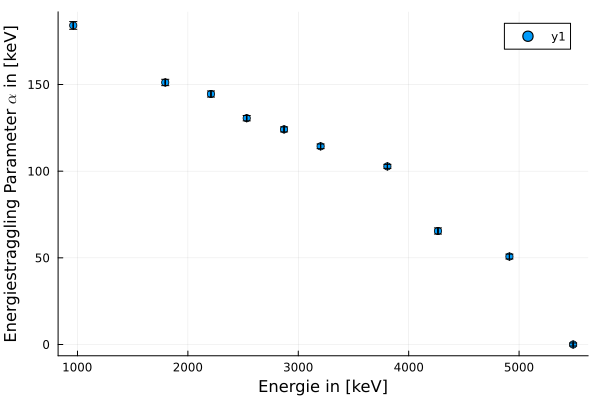

In [7]:
fig_alpha_E = plot(
    Es, alphas,
    xerror=D_Es, yerror=D_alphas,
    seriestype="scatter",
    xlabel="Energie in [keV]",
    ylabel="Energiestraggling Parameter " *L"\alpha" * " in [keV]" 
)

In [8]:
FWHM_E = FWHMs ./ Es .* 100
D_FWHM_E = sqrt.((D_FWHMs ./ Es).^2 + (FWHMs ./ Es.^2 .* D_Es).^2)*100

for i in 1:length(Es)
    println(FWHM_E[i], " +- ", D_FWHM_E[i])
end

0.9199045485181341 +- 0.016394552581008533
1.4574766925864102 +- 0.03256997368131916
1.9389023046444565 +- 0.04689497694928371
3.0074595503256987 +- 0.03152407676834359
3.9034443993379755 +- 0.04372945158770441
4.667038172192812 +- 0.0522591458141902
5.5272612420545615 +- 0.0631928183392067
6.9304241546331085 +- 0.08153005152802721
8.880717588723606 +- 0.10597104679179178
19.85439417576703 +- 0.2404895633503729
